## Sampling Distributions

### 목차

1) [Sample and Sample Mean](#part1) <br>
2) [Central Limit Theorem](#part2) <br>
3) [Chisquare distribution](#part3) <br>
3) [t distribution](#part4) <br>

### 1) Sample and Sample Mean <a id="part1"></a>



In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#create sample from a normal population N(60,10)
N=100000 #populatione size
m=60   #mean
s=10   #sd

population = norm.rvs(m, s, size=N)  #정규분포로부터 임의 생성

In [3]:
population[:5] #일부 확인

array([52.56441156, 48.88980948, 58.36158709, 68.7597102 , 71.6148351 ])

In [6]:
#표본을 선택
from numpy.random import choice
n=100 #sample size
sample = choice(population, n)
sample

array([76.14683445, 57.67752697, 69.41924556, 54.10051737, 56.86804671,
       58.18900155, 79.30109879, 38.02654508, 59.08520003, 59.62023672,
       52.92814187, 61.98430257, 78.43420798, 51.24079301, 73.90054844,
       56.02553274, 61.90446919, 41.26481764, 43.94263025, 51.053851  ,
       50.70331323, 58.93103013, 58.98459242, 57.09895978, 45.19825256,
       66.44160091, 81.90573061, 37.60855125, 32.8663687 , 54.84030399,
       39.91020619, 50.99845252, 49.58614354, 46.40021622, 76.13609475,
       61.95247024, 59.43655065, 87.83136164, 47.21267478, 64.8510711 ,
       57.23608088, 51.83930857, 57.96416116, 69.32228147, 77.62931096,
       54.71102384, 66.94048809, 65.51252646, 56.53513946, 72.79287313,
       60.74977458, 56.49467019, 57.83482846, 47.96416005, 74.75181172,
       76.18483877, 52.89476962, 49.75638767, 57.95385183, 50.43068848,
       83.03238416, 59.99653756, 36.19678602, 54.26528664, 61.91399789,
       43.24526075, 58.62541158, 83.51466779, 62.69943977, 51.80

In [7]:
#표본 평균 구하기
np.mean(sample)  #또는 np.average(sample)

59.01195590681325

#### 표본 선택을 여러번 반복하여 그때 마다 얻은 sample mean의 히스토그램을 그려보자. 
- 표본선택과 표본평균 구하기의 모의실험(simulation) 

Text(0, 0.5, 'Probability density')

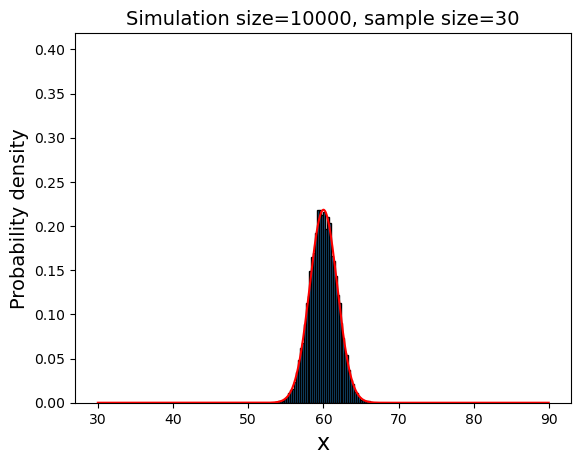

In [12]:
#표본평균의 sampling distribution 히스토그램
M=10000  #실험 횟수
n=30 #표본 크기
m=60   #population mean 
s=10   #population sd
sampleMat = choice(population, size=(M,n))  #Mxn 행렬에 표본선택을 반복해서 저장

meanVec=np.mean(sampleMat, axis=1)  #각 행별 평균을 벡터로 구함

x = np.arange(m-3*s, m+3*s, 0.05) 
y = norm.pdf(x, m, s/np.sqrt(n)) #표본평균의 pdf

fig,ax=plt.subplots()

ax.hist(meanVec, density=True, edgecolor='black', bins=50) #히스토그램 넓이합이 1
ax.set_xlabel('x', fontsize=16)
ax.plot(x, y, color='red', label="Normal distribution") #빨간 라인 
ax.set_ylim([0, max(y)+0.2])
ax.set_title(f"Simulation size={M}, sample size={n}", fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)

In [9]:
meanVec.shape

(1000,)

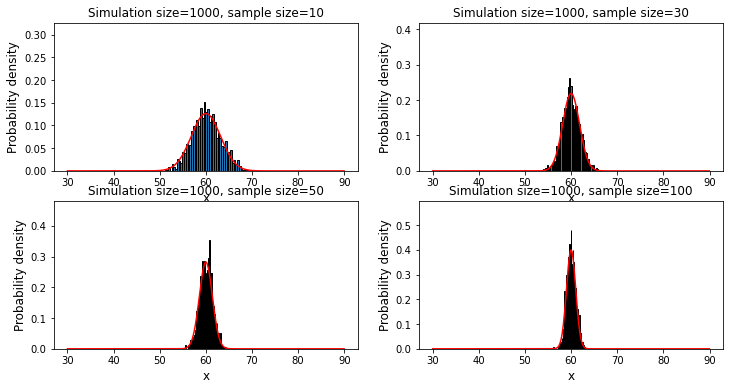

In [33]:
#표본평균의 sampling distribution 히스토그램(여러 n 크기에 대해 같이 그리기)
M=1000  #실험 횟수
narr=np.array([10,30, 50, 100]) #표본 크기 array
m=60   #population mean 
s=10   #population sd


fig, ax = plt.subplots(2, 2, figsize=(12,6))

for i in np.arange(4):
    n=narr[i]
    sampleMat = choice(population, size=(M,n))  #Mxn 행렬에 표본선택을 반복해서 저장
    meanVec=np.mean(sampleMat, axis=1)  #각 행별 평균을 벡터로 구함

    x = np.arange(m-3*s, m+3*s, 0.05) 
    y = norm.pdf(x, m, s/np.sqrt(n))
    
    bnum=np.binary_repr(i, width=2) #이진수 표현으로 변환
    bnumlist=list(bnum)
    ind1, ind2 = [int(j) for j in bnumlist]
    
    ax[ind1][ind2].hist(meanVec, density=True, edgecolor='black', bins=50)
    ax[ind1][ind2].set_xlabel('x', fontsize=12)
    ax[ind1][ind2].plot(x, y, color='red', label="Normal distribution")
    ax[ind1][ind2].set_ylim([0, max(y)+0.2])
    ax[ind1][ind2].set_title(f"Simulation size={M}, sample size={n}", fontsize=12)
    ax[ind1][ind2].set_ylabel('Probability density', fontsize=12)




### 2) Central Limit Theorem <a id="part2"></a>
- Uniform 분포, skewed 분포(beta 분포), Mixture 분포(normal mixture) 를 가지는 population에서 sample을 추출할 때 언제 정규분포랑 가까워 지는지 확인해 보자. 
- 4개의 sample size를 비교할 예정

#### A. 모집단이 uniform을 따를 때

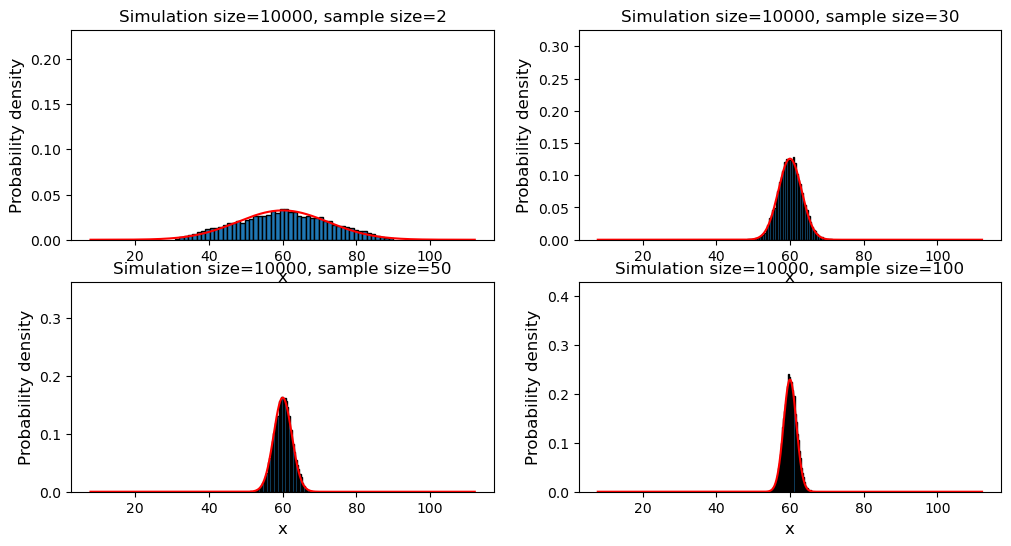

In [15]:
#population : uniform(30, 90)
from scipy.stats import uniform
N=100000 #populatione size
M=10000  #실험 횟수
narr=np.array([2, 30, 50, 100]) #표본 크기 array
a=30   #uniform parameter 1
b=90   #uniform parameter 2

population = uniform.rvs(a, b-a, size=N) #uniform 분포에서 random number 생성

m=np.mean(population)
s=np.std(population)

fig, ax = plt.subplots(2, 2, figsize=(12,6))

for i in np.arange(4):
    n=narr[i]
    sampleMat = choice(population, size=(M,n))  #Mxn 행렬에 표본선택을 반복해서 저장
    meanVec=np.mean(sampleMat, axis=1)  #각 행별 평균을 벡터로 구함

    x = np.arange(m-3*s, m+3*s, 0.05) 
    y = norm.pdf(x, m, s/np.sqrt(n))
    
    bnum=np.binary_repr(i, width=2) #이진수 표현으로 변환
    bnumlist=list(bnum)
    ind1, ind2 = [int(j) for j in bnumlist]
    
    ax[ind1][ind2].hist(meanVec, density=True, edgecolor='black', bins=50)
    ax[ind1][ind2].set_xlabel('x', fontsize=12)
    ax[ind1][ind2].plot(x, y, color='red', label="Normal distribution")
    ax[ind1][ind2].set_ylim([0, max(y)+0.2])
    ax[ind1][ind2].set_title(f"Simulation size={M}, sample size={n}", fontsize=12)
    ax[ind1][ind2].set_ylabel('Probability density', fontsize=12)


#### B. 모집단이 한쪽으로 치우쳤을 때 (skewed)
- beta(a, b)에서 a>b 또는 a<b를 설정할 수 있음 (범위 0~1)


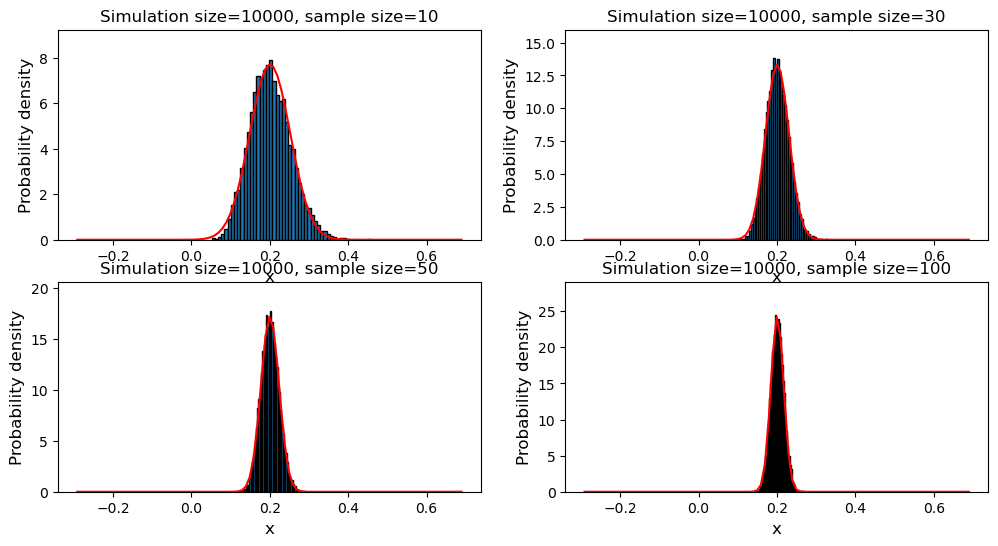

In [21]:
#population : beta(1, 5)
from scipy.stats import beta
N=100000 #populatione size
M=10000  #실험 횟수
narr=np.array([10,30, 50, 100]) #표본 크기 array
a=1  #uniform parameter 1
b=5   #uniform parameter 2

population = beta.rvs(a, b-a, size=N) #beta 분포에서 random number 생성

m=np.mean(population)
s=np.std(population)

fig, ax = plt.subplots(2, 2, figsize=(12,6))

for i in np.arange(4):
    n=narr[i]
    sampleMat = choice(population, size=(M,n))  #Mxn 행렬에 표본선택을 반복해서 저장
    meanVec=np.mean(sampleMat, axis=1)  #각 행별 평균을 벡터로 구함

    x = np.arange(m-3*s, m+3*s, 0.01) 
    y = norm.pdf(x, m, s/np.sqrt(n))
    
    bnum=np.binary_repr(i, width=2) #이진수 표현으로 변환
    bnumlist=list(bnum)
    ind1, ind2 = [int(j) for j in bnumlist]
    
    ax[ind1][ind2].hist(meanVec, density=True, edgecolor='black', bins=50)
    ax[ind1][ind2].set_xlabel('x', fontsize=12)
    ax[ind1][ind2].plot(x, y, color='red', label="Normal distribution")
    ax[ind1][ind2].set_ylim([0, max(y)*1.2])
    ax[ind1][ind2].set_title(f"Simulation size={M}, sample size={n}", fontsize=12)
    ax[ind1][ind2].set_ylabel('Probability density', fontsize=12)


#### C. 모집단이 normal mixture 일 때 (bimodal)
- 평균이 다른 두 모집단을 합쳐서 population 을 구성함

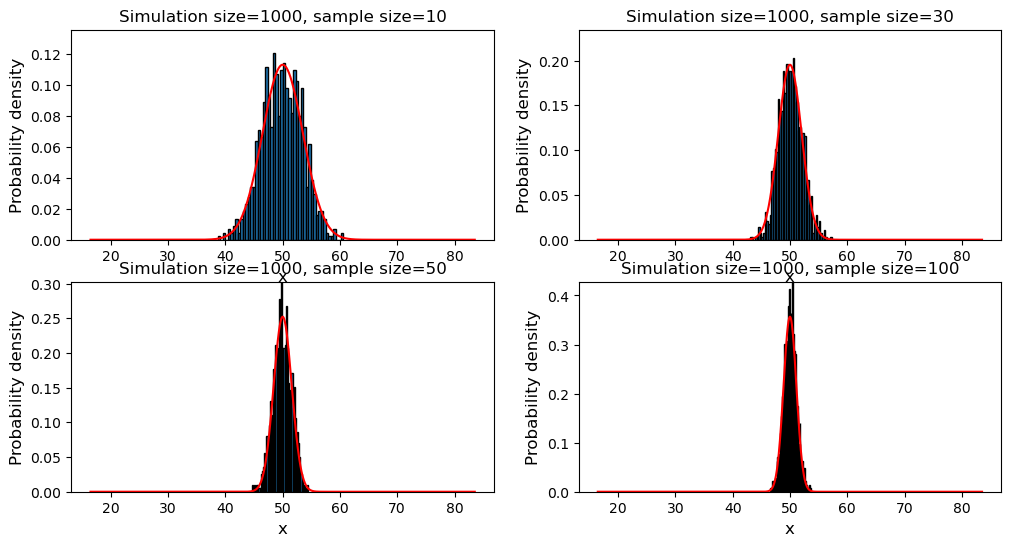

In [25]:
#population : 1: 1 mixture of N(40,5) , N(60,5)
from scipy.stats import norm
N=100000 #populatione size
M=1000  #실험 횟수
narr=np.array([10, 30, 50, 100]) #표본 크기 array
m1=40   #population mean 1
m2=60   #population mean 12
s=5   #population sd

population1 = norm.rvs(m1, s, size=int(N/2)) #normal 분포에서 random number 생성
population2 = norm.rvs(m2, s, size=int(N/2)) #normal 분포에서 random number 생성

population = np.concatenate((population1, population2))

m=np.mean(population)
s=np.std(population)

fig, ax = plt.subplots(2, 2, figsize=(12,6))

for i in np.arange(4):
    n=narr[i]
    sampleMat = choice(population, size=(M,n))  #Mxn 행렬에 표본선택을 반복해서 저장
    meanVec=np.mean(sampleMat, axis=1)  #각 행별 평균을 벡터로 구함

    x = np.arange(m-3*s, m+3*s, 0.05) 
    y = norm.pdf(x, m, s/np.sqrt(n))
    
    bnum=np.binary_repr(i, width=2) #이진수 표현으로 변환
    bnumlist=list(bnum)
    ind1, ind2 = [int(j) for j in bnumlist]
    
    ax[ind1][ind2].hist(meanVec, density=True, edgecolor='black', bins=50)
    ax[ind1][ind2].set_xlabel('x', fontsize=12)
    ax[ind1][ind2].plot(x, y, color='red', label="Normal distribution")
    ax[ind1][ind2].set_ylim([0, max(y)*1.2])
    ax[ind1][ind2].set_title(f"Simulation size={M}, sample size={n}", fontsize=12)
    ax[ind1][ind2].set_ylabel('Probability density', fontsize=12)

### 3) Chi-square distribution <a id="part3"></a>


In [2]:
#여기를 먼저 실행
from scipy.stats import chi2

In [58]:
#chisquare(df) 를 따르는 확률변수 X에 대해 pdf 값을 구할 때
df=3
x=2
chi2.pdf(x, df)    

0.2075537487102974

In [9]:
#chisquare(df) 를 따르는 확률변수 X에 대해 cdf 값 F(x)=P(X<=x)를 구할 때
df=26
x=30
chi2.cdf(x, df)    

0.732388966607423

In [8]:
#chisquare(df)를 따르는 확률변수 Z에 대해 percent point 값을 구할 때
df=15
p=0.05 

chi2.ppf(1-p, df)    # upper percent point 는 1-p를 넣음

24.995790139728616

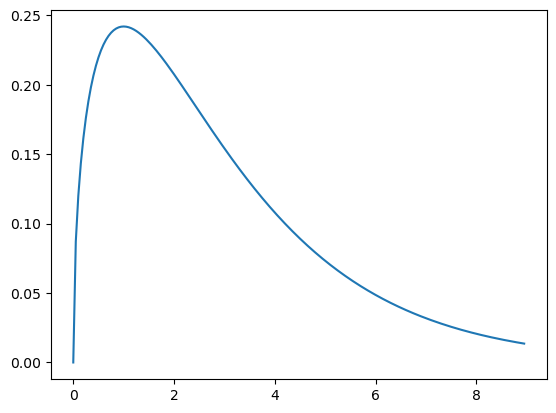

In [7]:
#chisquare(df)를 따르는 확률변수 X에 대해 pdf 의 그래프
df=3

x = np.arange(0, df*3, 0.05) 
y = chi2.pdf(x, df)
   
plt.plot(x, y) 
plt.show()

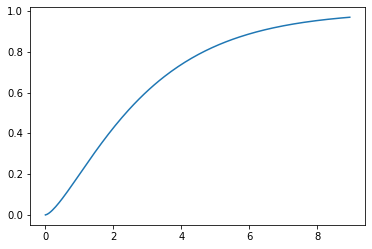

In [61]:
#chisquare(df)를 따르는 확률변수 X에 대해 cdf 의 그래프
df=3

x = np.arange(0, df*3, 0.05) 
y = chi2.cdf(x, df)
   
plt.plot(x, y) 
plt.show()

Text(0, 0.5, 'Probability density')

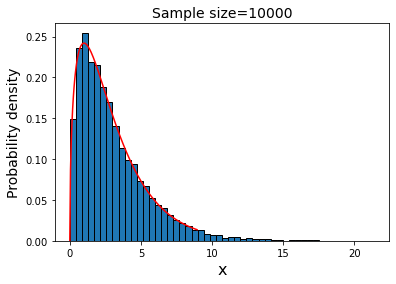

In [66]:
#chisquare(df) 를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
df=3
size=10000

x = np.arange(0, df*3, 0.05) 
y = chi2.pdf(x, df)

sample = chi2.rvs(df, size=size)

fig,ax=plt.subplots()


ax.hist(sample, density=True, edgecolor='black', bins=50)
ax.set_xlabel('x', fontsize=16)
ax.plot(x, y, color='red', label="Chisquare distribution")
ax.set_ylim([0, max(y)*1.1])
ax.set_title("Sample size={}".format(size), fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)

### 4) t distribution <a id="part4"></a>

In [10]:
#여기를 먼저 실행
from scipy.stats import t

In [68]:
#t(df) 를 따르는 확률변수 X에 대해 pdf 값을 구할 때
df=30
x=2
t.pdf(x, df)    

0.06750966066389293

In [11]:
#tdf) 를 따르는 확률변수 X에 대해 cdf 값 F(x)=P(X<=x)를 구할 때
df=12
x=1.4
t.cdf(x, df)    

0.9065834967360727

In [12]:
#t(df)를 따르는 확률변수 Z에 대해 percent point 값을 구할 때
df=9
p=0.025

t.ppf(1-p, df)    # upper percent point 는 1-p를 넣음

2.2621571627409915

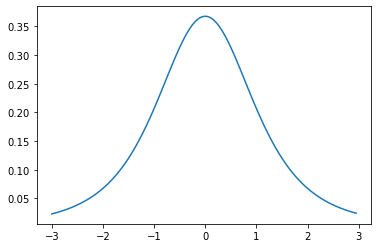

In [71]:
#t(df)를 따르는 확률변수 X에 대해 pdf 의 그래프
df=30

x = np.arange(-3, 3, 0.05) 
y = t.pdf(x, df)
   
plt.plot(x, y) 
plt.show()

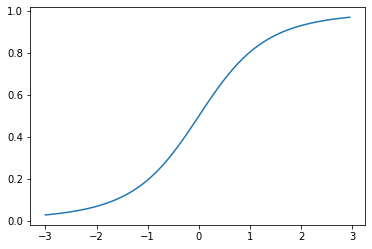

In [72]:
#t(df)를 따르는 확률변수 X에 대해 cdf 의 그래프
df=30

x = np.arange(-3, 3, 0.05) 
y = t.cdf(x, df)
   
plt.plot(x, y) 
plt.show()

Text(0, 0.5, 'Probability density')

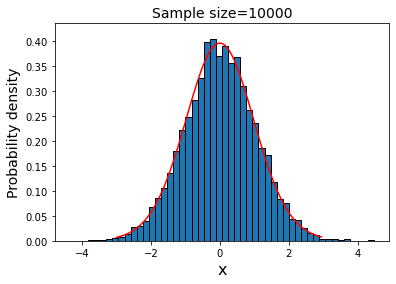

In [75]:
#t(df) 를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
df=30
size=10000

x = np.arange(-3, 3, 0.05) 
y = t.pdf(x, df)

sample = t.rvs(df, size=size)

fig,ax=plt.subplots()


ax.hist(sample, density=True, edgecolor='black', bins=50)
ax.set_xlabel('x', fontsize=16)
ax.plot(x, y, color='red', label="t distribution")
ax.set_ylim([0, max(y)*1.1])
ax.set_title("Sample size={}".format(size), fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)